# K-Nearest-Neighbors

👇 Load the `houses_clean.csv` dataset located in the `data` folder  
Or you can load it directly from this URL: [https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_clean.csv](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_clean.csv).  

The dataset description can be found [here](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_dataset_description.txt).

In [13]:
import pandas as pd

df = pd.read_csv('data/houses_clean.csv')
df

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,CentralAir,SalePrice
0,0.380070,0.375,0.333333,0.500,1,208500
1,-0.312090,0.375,0.333333,0.875,1,181500
2,0.497489,0.375,0.333333,0.500,1,223500
3,0.390885,0.375,0.333333,0.500,1,140000
4,1.134029,0.500,0.333333,0.500,1,250000
...,...,...,...,...,...,...
1455,0.282735,0.375,0.333333,0.500,1,175000
1456,0.940904,0.375,0.333333,0.625,1,210000
1457,1.353418,0.500,0.333333,1.000,1,266500
1458,-0.596369,0.250,0.333333,0.625,1,142125


💡 Most features are already preprocessed (scaled with normalization), as you did during the Data Preparation day  

💡 One feature, `GrLiveArea`, is not normalized. We keep it that way to see the impact of its normalization on our model performance later on  

👇 You can easily see this with descriptive statistics, check the min and max    

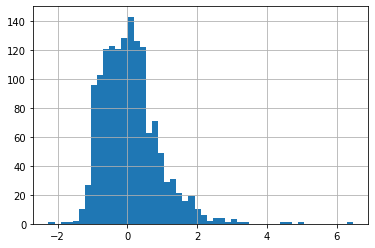

In [14]:
df.describe()

df.GrLivArea.hist(bins=50);

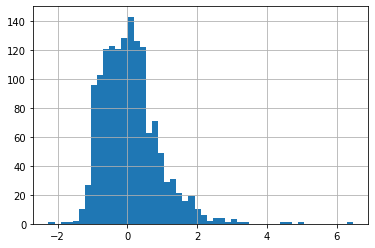

In [6]:
from sklearn.preprocessing import RobustScaler

r_scaler = RobustScaler()
r_scaler.fit(df[['GrLivArea']])

GrLivArea_r_scaled = r_scaler.transform(df[['GrLivArea']])

pd.DataFrame(GrLivArea_r_scaled)[0].hist(bins=50);

# Default KNN

🎯 The task is to predict the price of houses (`SalePrice`) with all the features.

👇 Use cross validation to evaluate a default [KNNRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html) on such a task.  
❓ What is the proportion of the variance in `SalePrice` that is explained by the features?  
Save your answer in a variable named `base_knn_score`.

<details>
<summary> 💡 Hint </summary>
    <br>
    ℹ️ The proportion of the variance in the dependent variable that is explained by the independent variables is the R2 score.
</details>

In [36]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_validate

X = df.drop(columns='SalePrice')
y = df.SalePrice

model = KNeighborsRegressor(n_neighbors=2)
model.fit(X, y)
cv_results = cross_validate(model, X, y)

base_knn_score = cv_results['test_score'].mean()
base_knn_score


0.5643185169984731

### 🧪 Check your code

In [33]:
from nbresult import ChallengeResult

result = ChallengeResult('default_score',
                         score = base_knn_score)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.8.10, pytest-7.1.2, pluggy-1.0.0 -- /bin/python3
cachedir: .pytest_cache
rootdir: /home/quantium/labs/lewagon/data-challenges/05-ML/03-Performance-metrics/01-KNN/tests
plugins: dash-1.19.0, anyio-3.6.1
collecting ... collected 1 item

test_default_score.py::TestDefault_score::test_score PASSED              [100%]

============================== 1 passed in 0.09s ===============================


💯 You can commit your code:

git add tests/default_score.pickle

git commit -m 'Completed default_score step'

git push origin master



# Scale sensitivity

KNNs and distance-based algorithms can be extremely sensitive to the scale of the features. 

👇 Rescale the feature set within an **exact common range**, and save it under a variable named `X_rescaled`  
Then, evaluate a model on the rescaled features and save its score under variable name `rescaled_score`.

<details>
<summary> 💡 Hint </summary>
    
`MinMaxScaler()`

Even though only `GrLiveArea` needs to be normalized, using the MinxMaxScaler on all your features is fine  
    
Indeed, Min-Max Scaling is an [idempotent](https://en.wikipedia.org/wiki/Idempotence) transformation: if $X_{max}=1$ and $X_{min}=0$, then $X = \frac{X - X_{min}}{X_{max} - X_{min}}$
</details>


In [37]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_rescaled = scaler.fit_transform(X)

cv_results = cross_validate(model, X_rescaled, y, scoring=['max_error', 'r2', 'neg_mean_absolute_error','neg_mean_squared_error'])

rescaled_score = cv_results['test_r2'].mean()
rescaled_score

0.6270720838084496

👉 The R2 score should have increased!

💡 It is preferable for features to be in an exact common range when modeling distance-based algorithms.  
However, it does not always guarantee a better score.  
It is a trial and error process.

### 🧪 Check your code

In [38]:
from nbresult import ChallengeResult

result = ChallengeResult('scale_sensitivity',
                         base_score = base_knn_score,
                         rescaled_features = X_rescaled,
                         rescaled_score = rescaled_score)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.8.10, pytest-7.1.2, pluggy-1.0.0 -- /bin/python3
cachedir: .pytest_cache
rootdir: /home/quantium/labs/lewagon/data-challenges/05-ML/03-Performance-metrics/01-KNN/tests
plugins: dash-1.19.0, anyio-3.6.1
collecting ... collected 2 items

test_scale_sensitivity.py::TestScale_sensitivity::test_rescaled_features PASSED [ 50%]
test_scale_sensitivity.py::TestScale_sensitivity::test_score_inscrease PASSED [100%]

============================== 2 passed in 0.11s ===============================


💯 You can commit your code:

git add tests/scale_sensitivity.pickle

git commit -m 'Completed scale_sensitivity step'

git push origin master



# Optimizing $k$

👇 Fine tune the parameter K (using the parameter `n_neighbors`) of a KNNRegressor on the rescaled features. Plot the evolution of the score as K increases from 2 until 25.

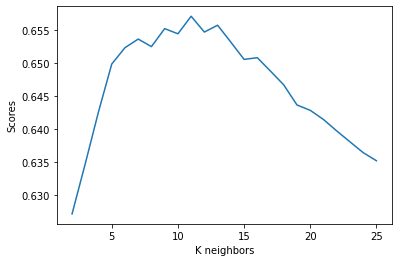

In [44]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

k_range2 = range(2, 26)
k_scores2 = []
for k in k_range2:
    knn2 = KNeighborsRegressor(n_neighbors=k)
    knn2.fit(X_rescaled, y)
    cv_results = cross_validate(knn2, X_rescaled, y)
    knn_score2 = cv_results['test_score'].mean()
    k_scores2.append(knn_score2)

k_scores2 = np.array(k_scores2)
k_range2 = np.array(k_range2)
plt.plot(k_range2, k_scores2)
plt.xlabel('K neighbors')
plt.ylabel('Scores');

❓ Which value of K produces the best performance? Save your answer under variable name `best_k`.

In [47]:
xmax = k_range2[np.argmax(k_scores2)]
ymax = k_scores2.max()
best_k = xmax

<details>
<summary> 👉 Solution 👈</summary>
    
By looking at your graph, you should see that the score stops increasing around k = 5 and the maximum score is reached for k = 11.

</details>



❓ What is you interpretation of the poor performance of the model for values $k$ < 5?

<details>
<summary> 👉 Solution 👈</summary>
    
When K is too small, the model will tend to overfit to the training set. It will focus on too few points to be able to generalize well. Increasing K will give the model more examples to base its predictions on.

</details>



### 🧪 Check your code

In [48]:
from nbresult import ChallengeResult

result = ChallengeResult('optimal_k',
                         optimal_k = best_k)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.8.10, pytest-7.1.2, pluggy-1.0.0 -- /bin/python3
cachedir: .pytest_cache
rootdir: /home/quantium/labs/lewagon/data-challenges/05-ML/03-Performance-metrics/01-KNN/tests
plugins: dash-1.19.0, anyio-3.6.1
collecting ... collected 1 item

test_optimal_k.py::TestOptimal_k::test_optimal_K_around_10 PASSED        [100%]

============================== 1 passed in 0.09s ===============================


💯 You can commit your code:

git add tests/optimal_k.pickle

git commit -m 'Completed optimal_k step'

git push origin master



# Overfitting a KNN 

💡 When the parameter K of KNNs is too small, there is a risk of overfitting the training set and not being able to generalize well. 

👇 Plot the learning curves of a KNN with parameter K=2.

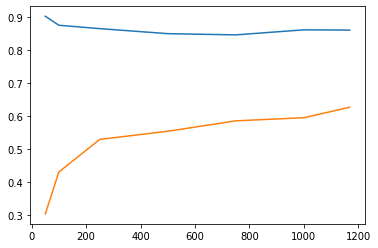

In [50]:
from sklearn.model_selection import learning_curve

train_sizes = [50,100,250,500,750,1000,1168]
train_sizes, train_scores, validation_scores = learning_curve( estimator = KNeighborsRegressor(n_neighbors=2), X=X_rescaled , y=y , train_sizes=train_sizes)

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis =1)

plt.plot(train_sizes, train_scores_mean)
plt.plot(train_sizes, validation_scores_mean);

👉 You should observe a high training score, but a low testing score. ⚠️ Overfitting alert ⚠️ This is due to a parameter K that is too low.

# Ideal K

👇 This time, plot the learning curves for the ideal K value you found in the "Optimizing $k$" section.

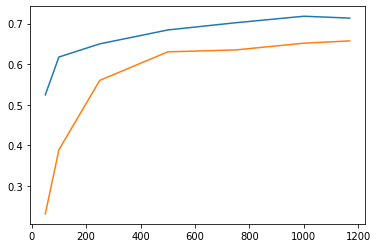

In [52]:
train_sizes = [50,100,250,500,750,1000,1168]
train_sizes, train_scores, validation_scores = learning_curve(estimator = KNeighborsRegressor(n_neighbors=best_k), X=X_rescaled , y=y , train_sizes=train_sizes)

train_scores_mean = train_scores.mean(axis=1)
validation_scores_mean = validation_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean)
plt.plot(train_sizes, validation_scores_mean);

👉 The curves should be close to converging, which indicates that the model is overfitting less and generalizing better.

💡 There are two key elements to remember when modelling with KNN models:  
    1. Distance-based algorithms are extremely sensitive to the scale of features  
    2. K must be tuned: it controls the tradeoff between performance, generalization, and overfitting

❓ What is the average difference between actual price and predicted price of the optimized KNN model? Compute your answer and save it under variable name `price_error`

<details>
<summary> 💡 Hint </summary>
    
The metric you should calculate is the **Negative Mean Absolute Error (MAE)**.

</details>

In [54]:
from sklearn.metrics import mean_absolute_error

knn2 = KNeighborsRegressor(n_neighbors=best_k)
knn2.fit(X_rescaled, y)

y_pred = knn2.predict(X_rescaled)
y2 = np.array(y)

price_error = mean_absolute_error(y2, y_pred, sample_weight=None, multioutput='raw_values')
price_error = price_error[0]
price_error


27799.708281444586

### 🧪 Check your code

<details>
<summary> 💡 Hint </summary>
    
To chose either or, you'll have to evaluate the score of a Linear Regression on the same task and compare it to the score of the KNN. Make sure you are comparing the same metrics!!

</details>




In [55]:
from nbresult import ChallengeResult

result = ChallengeResult('price_error',
                         error = price_error)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.8.10, pytest-7.1.2, pluggy-1.0.0 -- /bin/python3
cachedir: .pytest_cache
rootdir: /home/quantium/labs/lewagon/data-challenges/05-ML/03-Performance-metrics/01-KNN/tests
plugins: dash-1.19.0, anyio-3.6.1
collecting ... collected 1 item

test_price_error.py::TestPrice_error::test_price_error_range PASSED      [100%]

============================== 1 passed in 0.10s ===============================


💯 You can commit your code:

git add tests/price_error.pickle

git commit -m 'Completed price_error step'

git push origin master



# Model Selection

❓ Which of those two models would you chose to perform the task of predicting house prices:
- The KNN model you just tuned
- A Linear Regression model

Save your answer as a string under variable name `best_model` as either "KNN" or "LinearReg".

In [58]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, max_error

mse = mean_squared_error(y2, y_pred)

rmse = mse**0.5

mae = mean_absolute_error(y2, y_pred)

rsquared = r2_score(y2, y_pred)

max_error = max_error(y2, y_pred)

print('MSE =', round(mse, 2))
print('RMSE =', round(rmse, 2))
print('MAE =', round(mae, 2))
print('R2 =', round(rsquared, 2))
print('Max Error =', round(max_error, 2))

MSE = 1793854137.08
RMSE = 42353.92
MAE = 27799.71
R2 = 0.72
Max Error = 295695.45


In [61]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_rescaled, y)

y_pred2 = model.predict(X_rescaled)

mse = mean_squared_error(y2, y_pred2)

rmse = mse**0.5

mae = mean_absolute_error(y2, y_pred2)

rsquared = r2_score(y2, y_pred2)

max_error = max_error(y2, y_pred2)

print('MSE =', round(mse, 2))
print('RMSE =', round(rmse, 2))
print('MAE =', round(mae, 2))
print('R2 =', round(rsquared, 2))
print('Max Error =', round(max_error, 2))

[209234.41355567 144980.70569313 218709.08598998 ... 253741.97684628
 150472.50478476 149834.71003586]


TypeError: 'numpy.float64' object is not callable

In [62]:
best_model = 'KNN'

💡 When comparing either metric of both models, the KNN model should outperform the Linear Regression. This could be due to its ability to capture non-linear patterns in the data.

### 🧪 Check your code

In [63]:
from nbresult import ChallengeResult

result = ChallengeResult('best_model',
                         model = best_model)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.8.10, pytest-7.1.2, pluggy-1.0.0 -- /bin/python3
cachedir: .pytest_cache
rootdir: /home/quantium/labs/lewagon/data-challenges/05-ML/03-Performance-metrics/01-KNN/tests
plugins: dash-1.19.0, anyio-3.6.1
collecting ... collected 1 item

test_best_model.py::TestBest_model::test_best_model PASSED               [100%]

============================== 1 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/best_model.pickle

git commit -m 'Completed best_model step'

git push origin master



# 🏁